In [ ]:
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
%huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

In [ ]:
from datasets import load_dataset

ds = load_dataset("bigcode/the-stack-github-issues",
                  split="train", streaming=True)
sample = [ex for _, ex in zip(range(10000), ds)]

Resolving data files:   0%|          | 0/127 [00:00<?, ?it/s]

In [ ]:
sample

[{'repo': 'habari/habari',
  'issue_id': 1118963,
  'issue_number': 18,
  'pull_request': None,
  'events': [{'action': 'opened',
    'author': 'HabariImporter',
    'comment_id': None,
    'datetime': '2011-06-27T00:09:06Z',
    'masked_author': 'username_0',
    'text': "Initially reported by: @username_2 as #TRAC453 \nIt'd be nice if the error messages in the simple file silo were using the message system. For instance, trying to create a directory named '/' will create an error.",
    'title': "Simple File Silo: Errors aren't submitted to message system",
    'type': 'issue'},
   {'action': 'created',
    'author': 'Konzertheld',
    'comment_id': 264033767,
    'datetime': '2016-11-30 23:47:14+00:00',
    'masked_author': 'username_1',
    'text': 'I wonder if @heilemann still uses Habari and can confirm this is fixed (because it is, as I see it).',
    'title': None,
    'type': 'comment'},
   {'action': 'created',
    'author': 'Heilemann',
    'comment_id': 264213444,
    'date

In [33]:
import pandas as pd
import json

rows = []
for item in sample:
    for event in item['events']:
        rows.append({
            'repo': item['repo'],
            'author': event['author'],
            'authors': item['usernames'],
            'datetime': event['datetime'],
            'text': event['text']
        })

df = pd.DataFrame(rows)

def parse_authors(val):
    if isinstance(val, str):
        try:
            return json.loads(val)
        except json.JSONDecodeError:
            return []
    return val

df['authors'] = df['authors'].apply(parse_authors)

In [34]:
df

repo          author  \
0          habari/habari  HabariImporter   
1          habari/habari     Konzertheld   
2          habari/habari       Heilemann   
3          habari/habari     Konzertheld   
4          habari/habari     Konzertheld   
...                  ...             ...   
48455  nrkno/transcriber      schjonhaug   
48456  nrkno/transcriber      schjonhaug   
48457     bitpay/bitcore    illegalprime   
48458     bitpay/bitcore    illegalprime   
48459     bitpay/bitcore     micahriggan   

                                        authors                   datetime  \
0      [HabariImporter, Heilemann, Konzertheld]       2011-06-27T00:09:06Z   
1      [HabariImporter, Heilemann, Konzertheld]  2016-11-30 23:47:14+00:00   
2      [HabariImporter, Heilemann, Konzertheld]  2016-12-01 16:03:22+00:00   
3      [HabariImporter, Heilemann, Konzertheld]  2016-12-01 16:05:10+00:00   
4      [HabariImporter, Heilemann, Konzertheld]  2016-12-01 16:05:10+00:00   
...                                         ...                        ...   
48455                              [schjonhaug]       2018-06-01T12:08:41Z   
48456                              [schjonhaug]  2019-01-15 10:59:28+00:00   
48457               [illegalprime, micahriggan]       2018-06-01T16:22:50Z   
48458               [illegalprime, micahriggan]  2018-06-02 04:10:56+00:00   
48459               [illegalprime, micahriggan]  2018-07-06 18:58:37+00:00   

                                                    text  
0      Initially reported by: @username_2 as #TRAC453...  
1      I wonder if @heilemann still uses Habari and c...  
2      Thank you for thinking of me, but no, I'm no l...  
3                                                         
4      Ok. As far as I can see there are no errors th...  
...                                                  ...  
48455  RTF:\r\n\r\n* https://github.com/isNeilLin/htm...  
48456                                                     
48457  So I've tried to integrate the new block adapt...  
48458  @HarshitJoshi I made changed to your `block` u...  
48459  We ended up going in a different direction for...  

[48460 rows x 5 columns]

In [35]:
df.groupby('repo').count().sort_values('author', ascending=False)

author  authors  datetime  text
repo                                                          
kubernetes/kubernetes             397      397       397   397
NixOS/nixpkgs                     273      273       273   273
rust-lang/rust                    272      272       272   272
JuliaLang/julia                   259      259       259   259
tensorflow/tensorflow             192      192       192   192
...                               ...      ...       ...   ...
esfiddle/esfiddle                   1        1         1     1
zeroXten/check_influxdb_query       1        1         1     1
zenithdb/zenith                     1        1         1     1
AEGEE/frontend                      1        1         1     1
8fold/php-shoop                     1        1         1     1

[7910 rows x 4 columns]

In [39]:
repo_numpy = df[df['repo']=="numpy/numpy"]

In [52]:
repo_numpy

repo           author                           authors  \
7225   numpy/numpy          manuels    [pv, WarrenWeckesser, manuels]   
7226   numpy/numpy               pv    [pv, WarrenWeckesser, manuels]   
7227   numpy/numpy  WarrenWeckesser    [pv, WarrenWeckesser, manuels]   
7228   numpy/numpy  WarrenWeckesser    [pv, WarrenWeckesser, manuels]   
14220  numpy/numpy          will133                [charris, will133]   
14221  numpy/numpy          will133                [charris, will133]   
14222  numpy/numpy          charris                [charris, will133]   
14223  numpy/numpy          charris                [charris, will133]   
14224  numpy/numpy          charris                [charris, will133]   
14824  numpy/numpy      eric-wieser  [charris, hmaarrfk, eric-wieser]   
14825  numpy/numpy         hmaarrfk  [charris, hmaarrfk, eric-wieser]   
14826  numpy/numpy          charris  [charris, hmaarrfk, eric-wieser]   
14827  numpy/numpy         hmaarrfk  [charris, hmaarrfk, eric-wieser]   
14828  numpy/numpy          charris  [charris, hmaarrfk, eric-wieser]   
14829  numpy/numpy      eric-wieser  [charris, hmaarrfk, eric-wieser]   
14830  numpy/numpy          charris  [charris, hmaarrfk, eric-wieser]   
32372  numpy/numpy       Sharkoo123     [Sharkoo123, charris, seberg]   
32373  numpy/numpy          charris     [Sharkoo123, charris, seberg]   
32374  numpy/numpy           seberg     [Sharkoo123, charris, seberg]   
32375  numpy/numpy       Sharkoo123     [Sharkoo123, charris, seberg]   
32376  numpy/numpy       Sharkoo123     [Sharkoo123, charris, seberg]   
32377  numpy/numpy           seberg     [Sharkoo123, charris, seberg]   
32378  numpy/numpy           seberg     [Sharkoo123, charris, seberg]   
32379  numpy/numpy           seberg     [Sharkoo123, charris, seberg]   
35518  numpy/numpy   elendiastarman          [elendiastarman, seberg]   
35519  numpy/numpy           seberg          [elendiastarman, seberg]   
36109  numpy/numpy             mhvk      [pv, charris, mhvk, njsmith]   
36110  numpy/numpy          njsmith      [pv, charris, mhvk, njsmith]   
36111  numpy/numpy             mhvk      [pv, charris, mhvk, njsmith]   
36112  numpy/numpy          charris      [pv, charris, mhvk, njsmith]   
36113  numpy/numpy          njsmith      [pv, charris, mhvk, njsmith]   
36114  numpy/numpy          charris      [pv, charris, mhvk, njsmith]   
36115  numpy/numpy          charris      [pv, charris, mhvk, njsmith]   
36116  numpy/numpy          njsmith      [pv, charris, mhvk, njsmith]   
36117  numpy/numpy          charris      [pv, charris, mhvk, njsmith]   
36118  numpy/numpy          charris      [pv, charris, mhvk, njsmith]   
36119  numpy/numpy          njsmith      [pv, charris, mhvk, njsmith]   
36120  numpy/numpy               pv      [pv, charris, mhvk, njsmith]   
36121  numpy/numpy             mhvk      [pv, charris, mhvk, njsmith]   

                        datetime                    authors_with_mentions  \
7225   2017-02-01 08:34:32+00:00           [pv, WarrenWeckesser, manuels]   
7226   2017-02-08 09:56:01+00:00           [pv, WarrenWeckesser, manuels]   
7227   2021-10-02 00:26:19+00:00           [pv, WarrenWeckesser, manuels]   
7228   2021-10-02 00:26:20+00:00           [pv, WarrenWeckesser, manuels]   
14220  2018-07-26 16:33:54+00:00                       [charris, will133]   
14221  2018-07-26 16:38:44+00:00                       [charris, will133]   
14222  2018-07-26 16:50:07+00:00                       [charris, will133]   
14223  2018-07-26 16:50:07+00:00                       [charris, will133]   
14224  2018-07-26 16:55:31+00:00                       [charris, will133]   
14824       2018-09-15T03:20:10Z         [charris, hmaarrfk, eric-wieser]   
14825  2018-09-15 11:33:32+00:00  [charris, hmaarrfk, eric-wieser, lagru]   
14826  2018-09-15 20:10:39+00:00         [charris, hmaarrfk, eric-wieser]   
14827  2018-09-15 20:13:01+00:00  [charris, hmaarrfk, eric-wieser, lagru]   
14828  2018-09-

In [41]:
import re

def add_mentions(authors, text):

    mentions = [m for m in re.findall(r'@([A-Za-z0-9_-]+)', text) if not m.startswith('username_')]
    updated = authors.copy()

    for m in mentions:
        if m not in updated:
            updated.append(m)
    return updated

# Apply update
repo_numpy['authors_with_mentions'] = repo_numpy.apply(lambda row: add_mentions(row['authors'], row['text']), axis=1)

<ipython-input-41-dfb1cdf17ade>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repo_numpy['authors_with_mentions'] = repo_numpy.apply(lambda row: add_mentions(row['authors'], row['text']), axis=1)


In [44]:
repo_numpy = repo_numpy.drop(columns=['text'])

In [49]:
repo_numpy["authors_except_original"] = repo_numpy.apply(
    lambda row: [a for a in row["authors"] if a != row["author"]],
    axis=1
)

In [51]:
repo_numpy = repo_numpy[repo_numpy["authors_except_original"].map(len) > 0]

In [55]:
repo_numpy = repo_numpy[['author', 'datetime', 'authors_except_original']]
repo_numpy['datetime'] = pd.to_datetime(
    repo_numpy['datetime'],
    format='ISO8601',  # infers mixed ISO8601 strings
    utc=True           # normalize to UTC tz
)

In [56]:
!pip install networkx

In [58]:
import networkx as nx
import networkx as nx
from collections import defaultdict

G = nx.DiGraph()
interaction_counts = defaultdict(int)

for _, row in repo_numpy.iterrows():
    original_author = row['author']
    commenters = row['authors_except_original']

    for commenter in commenters:
        # Add node for each if not present
        G.add_node(original_author)
        G.add_node(commenter)
        # Directed edge: commenter → original_author
        interaction_counts[(commenter, original_author)] += 1

# Add edges with weights
for (src, dst), weight in interaction_counts.items():
    G.add_edge(src, dst, weight=weight)


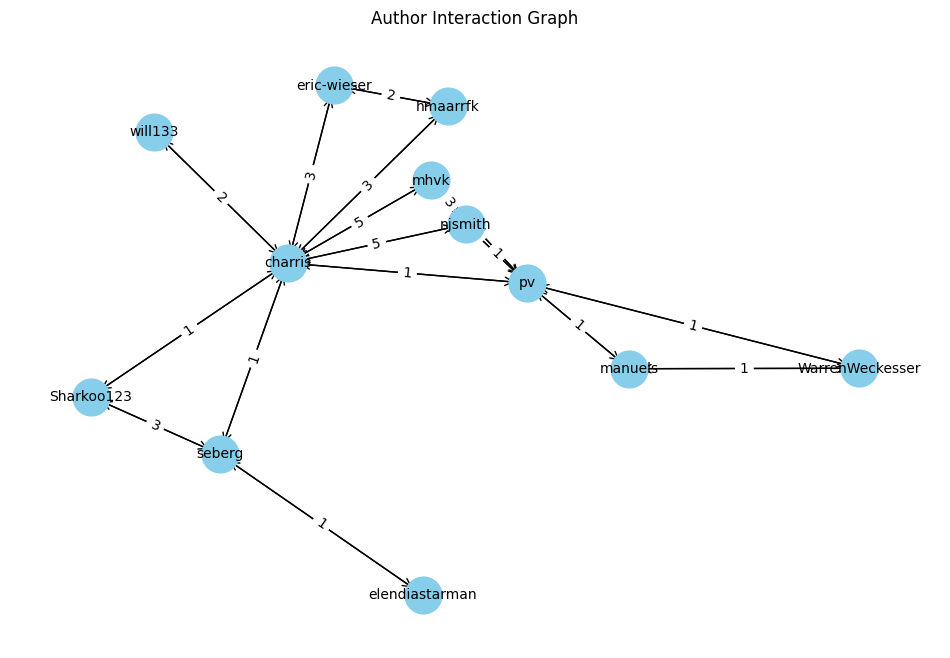

In [59]:
import matplotlib.pyplot as plt

# Set layout for better visualization
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw nodes and edges
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.title("Author Interaction Graph")
plt.show()


In [74]:
from collections import defaultdict
import json

# Parse datetime and extract month
repo_numpy['datetime'] = pd.to_datetime(repo_numpy['datetime'], format='ISO8601')
repo_numpy['month'] = repo_numpy['datetime'].dt.to_period('M').astype(str)

# Sort by month to ensure chronological accumulation
repo_numpy = repo_numpy.sort_values(by='month')

# Accumulative collaboration data
cumulative_edge_counter = defaultdict(int)
collaboration_data = {}

for month, group in repo_numpy.groupby('month'):
    for _, row in group.iterrows():
        source = row['author']
        targets = row['authors_except_original']
        for target in targets:
            if source != target:
                cumulative_edge_counter[(source, target)] += 1

    # Snapshot of cumulative edges up to this month
    collaboration_data[month] = [
        {"from": src, "to": tgt, "count": count}
        for (src, tgt), count in cumulative_edge_counter.items()
    ]

<ipython-input-74-da7a7df64990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repo_numpy['datetime'] = pd.to_datetime(repo_numpy['datetime'], format='ISO8601')
<ipython-input-74-da7a7df64990>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  repo_numpy['month'] = repo_numpy['datetime'].dt.to_period('M').astype(str)
<ipython-input-74-da7a7df64990>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repo_numpy['month'] = repo_numpy['datetime'].dt.to_period('M').a

In [75]:
collaboration_data

{'2014-11': [{'from': 'elendiastarman', 'to': 'seberg', 'count': 1}],
 '2015-04': [{'from': 'elendiastarman', 'to': 'seberg', 'count': 1},
  {'from': 'mhvk', 'to': 'pv', 'count': 2},
  {'from': 'mhvk', 'to': 'charris', 'count': 2},
  {'from': 'mhvk', 'to': 'njsmith', 'count': 2},
  {'from': 'njsmith', 'to': 'pv', 'count': 1},
  {'from': 'njsmith', 'to': 'charris', 'count': 1},
  {'from': 'njsmith', 'to': 'mhvk', 'count': 1}],
 '2015-05': [{'from': 'elendiastarman', 'to': 'seberg', 'count': 1},
  {'from': 'mhvk', 'to': 'pv', 'count': 3},
  {'from': 'mhvk', 'to': 'charris', 'count': 3},
  {'from': 'mhvk', 'to': 'njsmith', 'count': 3},
  {'from': 'njsmith', 'to': 'pv', 'count': 4},
  {'from': 'njsmith', 'to': 'charris', 'count': 4},
  {'from': 'njsmith', 'to': 'mhvk', 'count': 4},
  {'from': 'charris', 'to': 'pv', 'count': 5},
  {'from': 'charris', 'to': 'mhvk', 'count': 5},
  {'from': 'charris', 'to': 'njsmith', 'count': 5},
  {'from': 'pv', 'to': 'charris', 'count': 1},
  {'from': 'pv',